# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")


# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [31]:
# Checking the number of mice.
number_of_mice = mouse_data_complete["Mouse ID"].nunique()
number_of_mice 

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_mouse = mouse_data_complete.loc[mouse_data_complete["Mouse ID"]!='g989']
drop_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = drop_mouse["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#each regimen is why the first group variable is "DR" and tumor volume follows
summary_mean = mouse_data_complete.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
summary_mean

summary_median = mouse_data_complete.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
summary_median 

summary_variance = mouse_data_complete.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
summary_variance

summary_stdev = mouse_data_complete.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
summary_stdev

summary_sem = mouse_data_complete.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
summary_sem

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean": summary_mean, "Median": summary_median, "Variance": summary_variance, 
                               "Standard Deviation": summary_stdev, "SEM": summary_sem})
summary_df


C:\Users\nasrs\AppData\Local\Temp\ipykernel_7484\1394208053.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_mean = mouse_data_complete.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
C:\Users\nasrs\AppData\Local\Temp\ipykernel_7484\1394208053.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_median = mouse_data_complete.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
C:\Users\nasrs\AppData\Local\Temp\ipykernel_7484\1394208053.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to Fal

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_df1line = mouse_data_complete.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summary_df1line = summary_df1line.rename(columns={"mean":"Mean", "median": "Median", "var": "Variance", "std" : "Standard Deviation", "sem" : "SEM"})

# Using the aggregation method, produce the same summary statistics in a single line
summary_df1line

C:\Users\nasrs\AppData\Local\Temp\ipykernel_7484\2563663184.py:3: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_df1line = mouse_data_complete.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

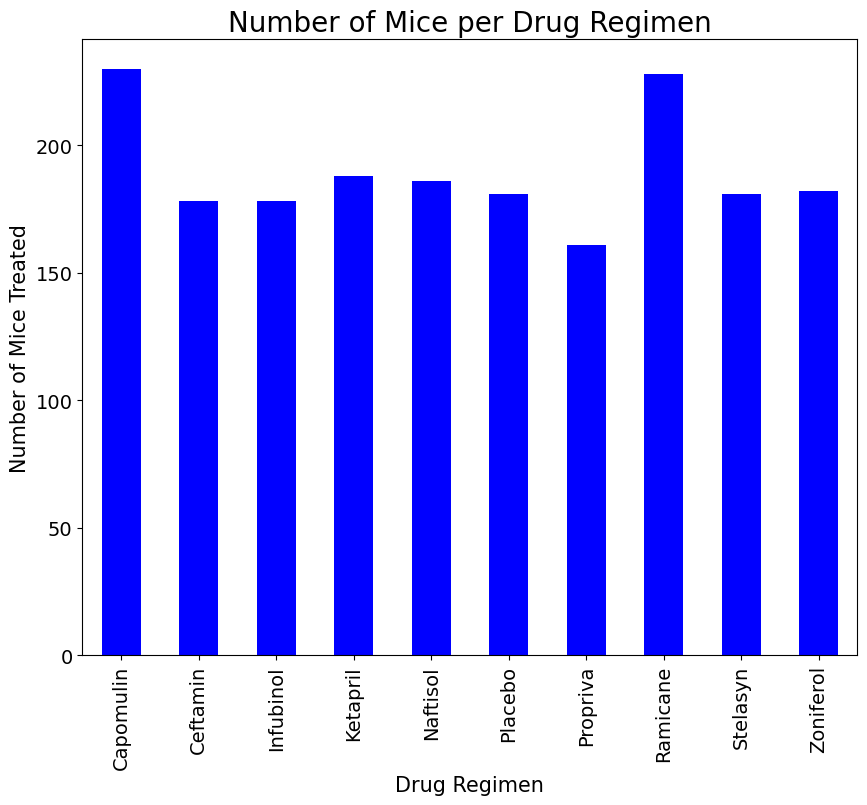

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_per_drug = mouse_data_complete.groupby(["Drug Regimen"]).count()["Mouse ID"]

pandas_plot = bar_per_drug.plot(kind="bar", color='b', figsize=(10,8), fontsize = 14)
plt.title("Number of Mice per Drug Regimen",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 15)
plt.ylabel("Number of Mice Treated", fontsize = 15)

plt.show()
plt.tight_layout()

bar_per_drug

Text(0, 0.5, 'Number of Mice Treated')

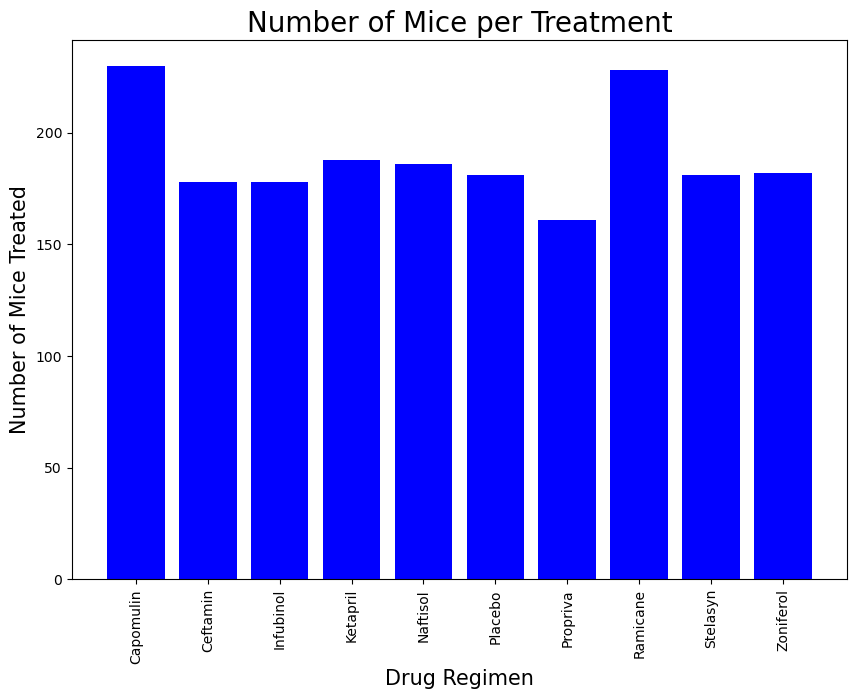

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_count = mouse_data_complete.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()
regimen_count

x_axis = np.arange(len(bar_per_drug))
tick_loc = [value+0.4 for value in x_axis]
fig1, ax1, = plt.subplots(figsize=(10,7))
plt.xticks(tick_loc, bar_per_drug.index.values, rotation="vertical")
plt.bar(x_axis, regimen_count, color='b', alpha=1, align="edge")
plt.title("Number of Mice per Treatment", fontsize = 20)
plt.xlabel("Drug Regimen", fontsize = 15)
plt.ylabel("Number of Mice Treated", fontsize = 15)

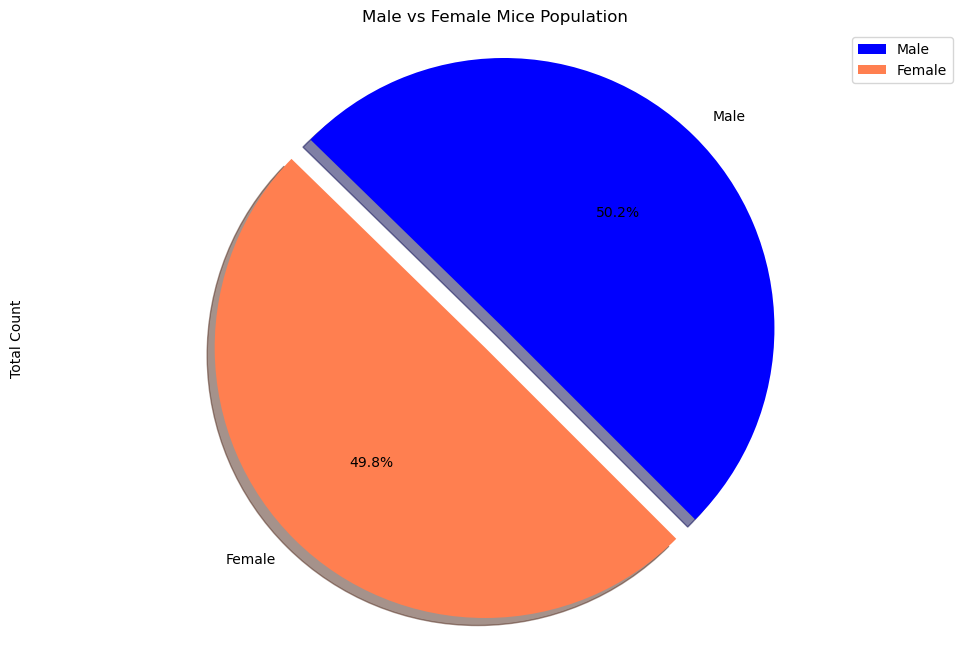

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pie = mouse_data_complete.loc[:, ["Sex", "Mouse ID"]]
gender_pie = gender_pie.drop_duplicates()
gender_total = gender_pie["Sex"].value_counts()

#create dataframe for variables
gender_df = pd.DataFrame({"Total Count": gender_total})

#create pie plot with distribution of F vs M
colors = ["blue", "coral"]
explode = (0.1, 0)
pandas_pie = gender_df.plot(kind="pie", figsize=(12,8), colors=colors, y="Total Count", title="Male vs Female Mice Population",
                            startangle=315, explode=explode, shadow=True, autopct="%1.1f%%")
#Display graph
plt.axis("equal")
plt.show()

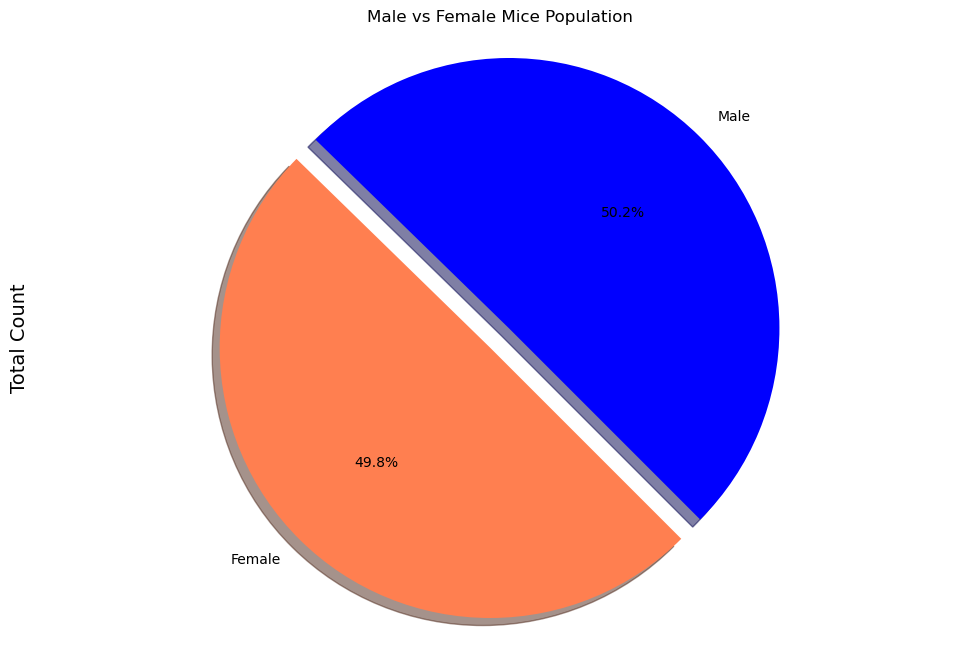

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pie = mouse_data_complete.loc[:, ["Sex", "Mouse ID"]]
gender_pie = gender_pie.drop_duplicates()
gender_total = gender_pie["Sex"].value_counts()

labels = ["Male", "Female"]
colors = ["blue", "coral"]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(12,8))
plt.title("Male vs Female Mice Population", fontsize = 12)
plt.ylabel("Total Count",fontsize = 14)
plt.pie(gender_total, labels=labels, colors=colors, startangle=315, explode=explode, shadow=True, autopct= "%1.1f%%")
           
#set equal axis
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoint = mouse_data_complete.groupby(["Mouse ID"])["Timepoint"].max()
mouse_timepoint = mouse_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_mouse_time = mouse_timepoint.merge(mouse_data_complete, on=["Mouse ID", "Timepoint"], how="left")
merge_mouse_time

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
merge_mouse_time

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
total_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_grab = merge_mouse_time.loc[merge_mouse_time["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    print(tumor_grab.shape)
    # add subset 
    total_tumor_vol.append(tumor_grab)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_grab.quantile([.25, .5, .75])
    lowerq =quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_grab.loc[(tumor_grab < lower_bound) | (tumor_grab > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")

                          
                          


(25,)
For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
(25,)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
(25,)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
(25,)
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [16]:
total_tumor_vol

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 81     47.685963
 84     37.311846
 86     38.125164
 88     38.753265
 109    41.483008
 116    38.846876
 122    28.430964
 125    33.329098
 163    46.539206
 164    32.377357
 170    41.581521
 175    23.343598
 181    40.728578
 184    34.455298
 193    31.023923
 205    40.658124
 209    39.952347
 221    36.041047
 227    28.484033
 240    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 77     33.562402
 78     36.374510
 92     31.560470
 94     36.134852
 97     22.050126
 120    30.564625
 127    31.095335
 158    45.220869
 159    36.561652
 167    37.225650
 169    43.419381
 178    30.276232
 191    40.667713
 218    43.166373
 236    44.183451
 245    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

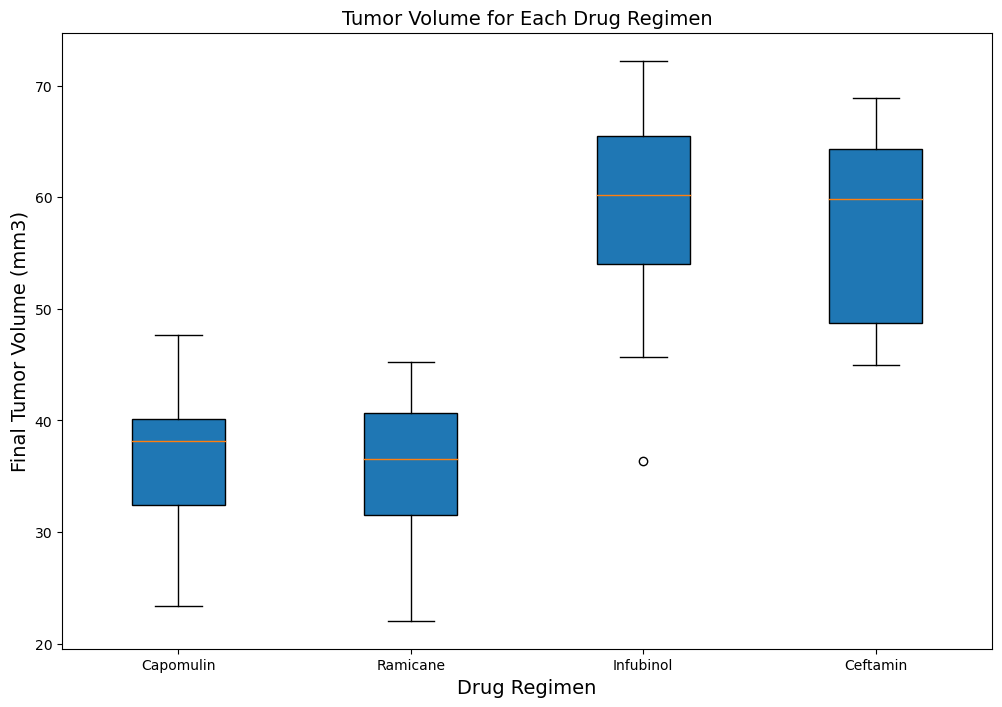

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title('Tumor Volume for Each Drug Regimen', fontsize=14)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen', fontsize=14)
ax1.boxplot(total_tumor_vol, labels=treatments, widths = 0.4, patch_artist=True,vert=True)

plt.show()

## Line and Scatter Plots

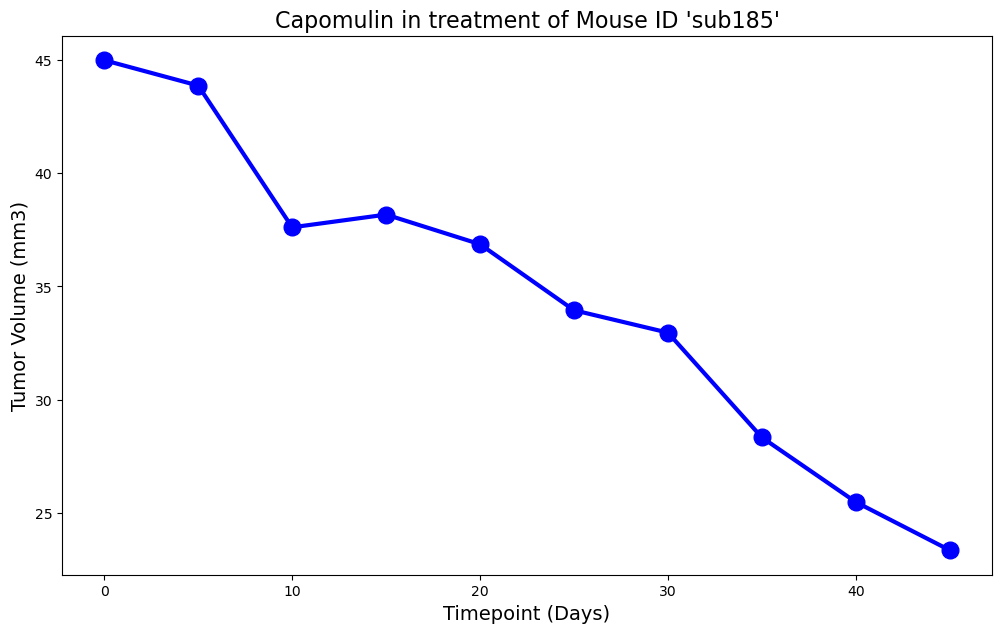

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_line = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Capomulin",:]
mouse_line
                                         
#retreive data for each mouse  
individual_mouse = mouse_line.loc[mouse_line["Mouse ID"] == "s185" ,:]
                                     
#specify plot 
x_axis = individual_mouse["Timepoint"]
tumor_volume = individual_mouse["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(12,7))                                    
plt.title("Capomulin in treatment of Mouse ID 'sub185'", fontsize =16)
plt.plot(x_axis, tumor_volume,linewidth=3, markersize=12,marker='o',color="blue", label="mm3")
plt.xlabel("Timepoint (Days)",fontsize =14)
plt.ylabel("Tumor Volume (mm3)",fontsize=14)
          
plt.show()
                                     

C:\Users\nasrs\AppData\Local\Temp\ipykernel_7484\3528902885.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_entire_cap = mouse_line.groupby(['Mouse ID']).mean()


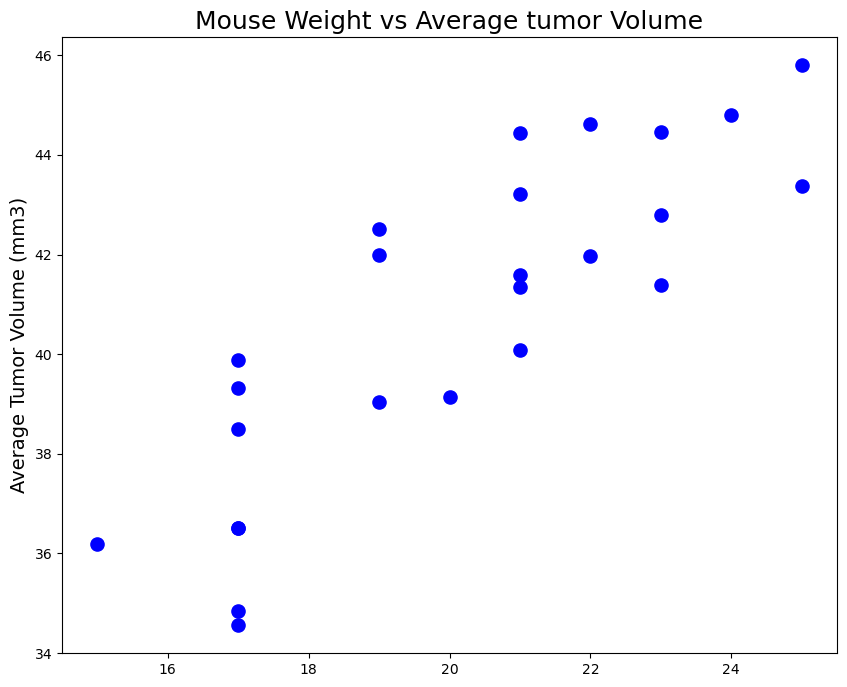

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_entire_cap = mouse_line.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots(figsize=(10,8))
marker_size = 12
plt.scatter(avg_entire_cap['Weight (g)'],avg_entire_cap['Tumor Volume (mm3)'],s=90, color="blue")
plt.title("Mouse Weight vs Average tumor Volume",fontsize =18)
plt.ylabel("Average Tumor Volume (mm3)",fontsize =14)
                         
plt.show()           
avg_entire_cap.head()                         

## Correlation and Regression

The correlation between mouse weight and average observed tumor volume is: 0.84


<function matplotlib.pyplot.show(close=None, block=None)>

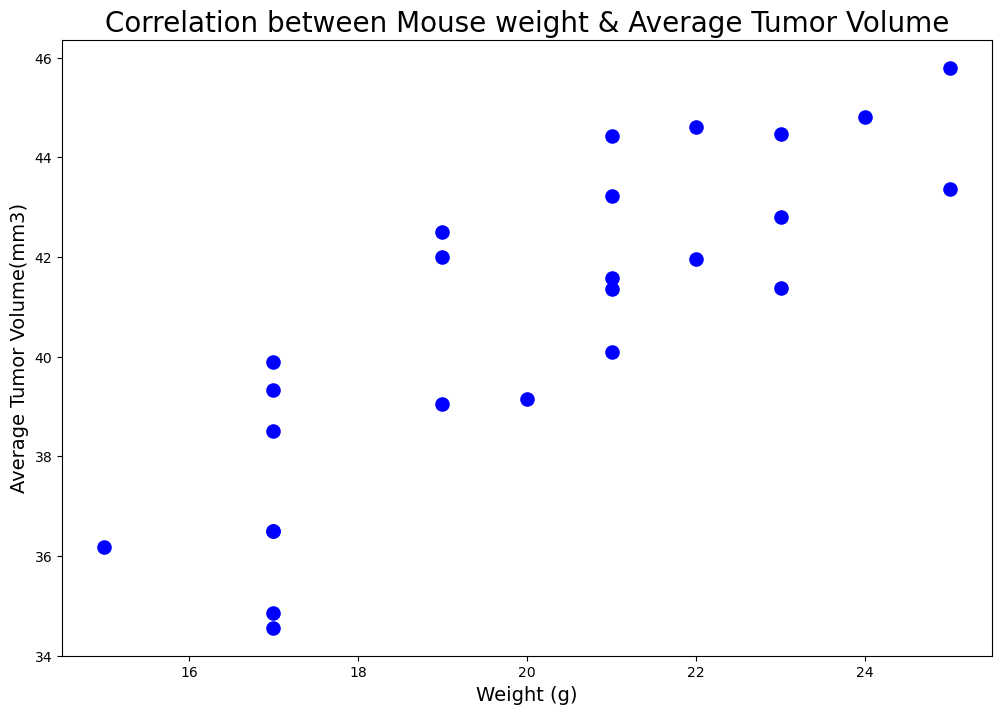

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_co = round(st.pearsonr(avg_entire_cap['Weight (g)'],avg_entire_cap['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average observed tumor volume is: {correlation_co}")

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(avg_entire_cap['Weight (g)'],avg_entire_cap['Tumor Volume (mm3)'],s=90, color="blue")
plt.title("Correlation between Mouse weight & Average Tumor Volume",fontsize =20)
plt.xlabel("Weight (g)", fontsize = 14)
plt.ylabel("Average Tumor Volume(mm3)", fontsize = 14)
                       
                       
plt.show

y = 0.95x + 21.55


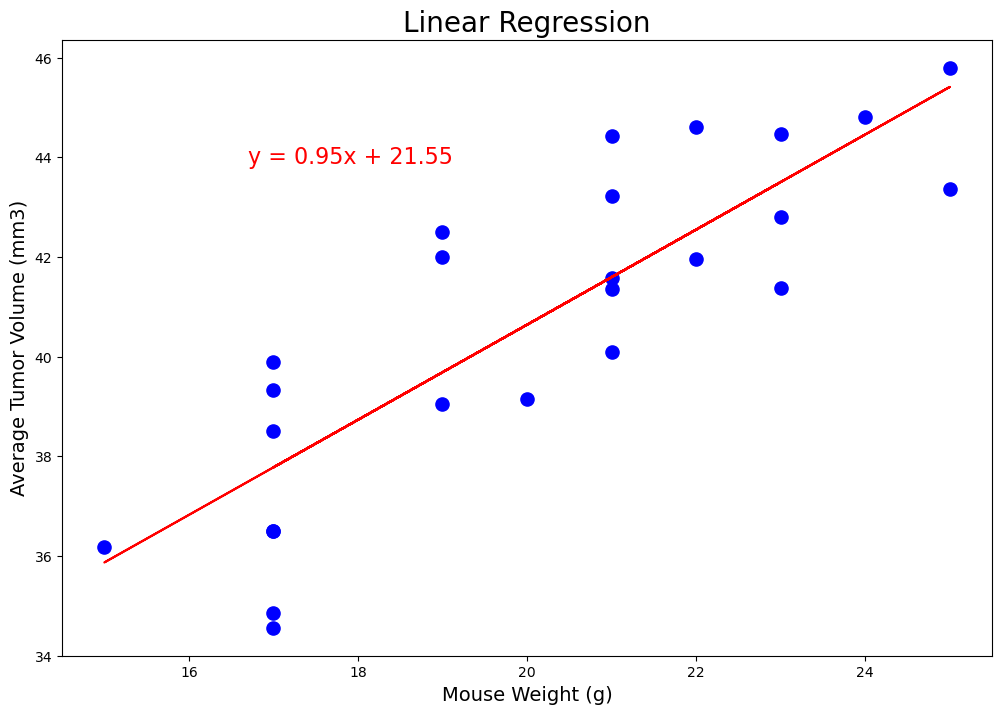

In [36]:
x_values = avg_entire_cap['Weight (g)']
y_values = avg_entire_cap['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_linvalues = x_values * slope + intercept
lin_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(lin_eq)

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(x_values,y_values, s=90, color="blue")
plt.plot(x_values,regress_linvalues,"r-")
plt.title("Linear Regression", fontsize=20)
plt.xlabel("Mouse Weight (g)", fontsize =14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)
plt.annotate(lin_eq, xy=(20,40), xycoords="data",xytext=(0.2,0.80), textcoords="axes fraction", fontsize=16,color="red")

plt.show()